x: [[ 6  1]
 [ 9  3]
 [12  2]
 [14  3]
 [16  4]]
y: [ 9 12 29 35 59]
系数(w1, w2)为 [ 4.94890511 -0.70072993]
截距(b)为: -25.79562043795622
投资1千万，推广3百万的电影票预测为: 21.59124087591241 百万
投资1千万，推广3百万的电影票预测为: [21.59124088] 百万


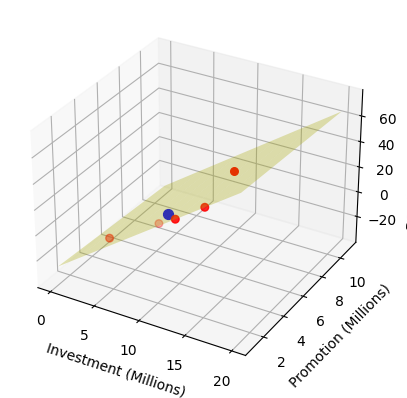

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model

x = np.array([[6,1,9], [9,3,12], [12,2,29], [14,3,35], [16,4,59]])

X = x[:,:-1]
Y = x[:, -1]
print('x:', X)
print('y:', Y)

#训练数据
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('系数(w1, w2)为', regr.coef_)
print('截距(b)为:', regr.intercept_)

# 模型预测
sample = np.array([[10, 3]])
y_predict = regr.predict(sample)
print(f'投资1千万，推广3百万的电影票预测为: {y_predict[0]} 百万')

#预测
y_predict = regr.predict(np.array([[10,3]]))
print('投资1千万，推广3百万的电影票预测为:', y_predict, '百万')

# 绘制图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(0, 20, 10)
x2 = np.arange(1, 20, 10)
x1, x2 = np.meshgrid(x1, x2)
z = regr.coef_[0] * x1 + regr.coef_[1] * x2 + regr.intercept_

ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o', s=30)
ax.scatter(sample[0, 0], sample[0, 1], y_predict, c='b', marker='o', s=50)
ax.plot_surface(x1, x2, z, color='y', alpha=0.3)

ax.set_xlabel('Investment (Millions)')
ax.set_ylabel('Promotion (Millions)')
ax.set_zlabel('Box Office (Millions)')

plt.show()

系数(w1, w2)为: [ 1.05116725 -0.58441742]
截距(b)为: 0.2509534018884461
房屋面积120平米，离市中心距离5公里的房价预测为: 123.46893599235521 万元


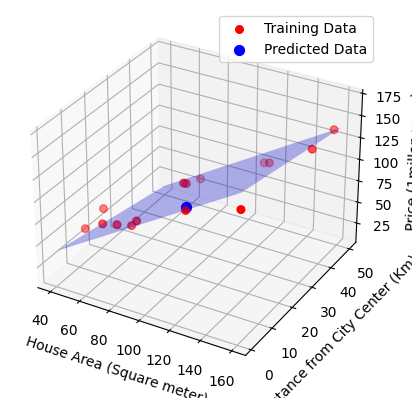

In [2]:
# 损失函数
def costFunc(theta, x_data, y_data):
    return ((x_data.dot(theta) - y_data) ** 2).sum() / float(2 * len(x_data))

# 批量梯度下降
def gradient_descent(theta, x_data, y_data, learning_rate, counter):
    for i in range(counter):
        gradients = x_data.T.dot(x_data.dot(theta) - y_data)
        theta = theta - learning_rate * (1 / len(x_data)) * gradients
    return theta

# 建立数据集
data = np.array([
    [120, 120, 5],
    [86, 70, 2],
    [150, 160, 1],
    [50, 45, 10],
    [76, 80, 8],
    [113, 100, 18],
    [102, 96, 22],
    [65, 50, 15],
    [92, 88, 5],
    [87, 78, 3],
    [75, 110, 50],
    [62, 80, 40],
    [90, 120, 45],
    [140, 158, 48],
    [145, 160, 35]
])

x = data[:, 1:]
y = data[:, 0]

# 添加偏置项，即截距
x_data = np.c_[np.ones(len(x)), x]

# 初始化参数向量
theta = np.zeros(x_data.shape[1])

# 设置学习率和迭代次数
learning_rate = 0.00001
counter = 10000

# 执行梯度下降算法
theta = gradient_descent(theta, x_data, y, learning_rate, counter)

# 输出系数和截距
print('系数(w1, w2)为:', theta[1:])
print('截距(b)为:', theta[0])

# 预测样本
sample = np.array([[120, 5]])
sample_data = np.c_[np.ones(len(sample)), sample]
y_predict = sample_data.dot(theta)
print(f'房屋面积120平米，离市中心距离5公里的房价预测为: {y_predict[0]} 万元')

# 绘制3D子图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制训练样本点
ax.scatter(x[:, 0], x[:, 1], y, color='red', s=30, label='Training Data')

# 绘制预测样本点
ax.scatter(sample[0, 0], sample[0, 1], y_predict[0], color='blue', s=50, label='Predicted Data')

# 生成平面上的点
x1 = np.linspace(40, 160, 10)
x2 = np.linspace(1, 50, 10)
x1, x2 = np.meshgrid(x1, x2)
z = theta[0] + theta[1] * x1 + theta[2] * x2

# 绘制拟合平面
ax.plot_surface(x1, x2, z, color='blue', alpha=0.3)

ax.set_xlabel('House Area (Square meter)')
ax.set_ylabel('Distance from City Center (Km)')
ax.set_zlabel('Price (1millon yuan)')

plt.legend()
plt.show()